# Model to classify human cells to whether the samples are benign (noncancerous) or malignant (cancerous) using Support Vector Machine

In [89]:
import pandas as pd
import pylab as pl
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
from sklearn import svm
from sklearn.metrics import f1_score , jaccard_score

In [69]:
cell_df = pd.read_csv("C:/Users/karan/downloads/cell_samples.csv")
cell_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [70]:
cell_df.shape

(699, 11)

In [71]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

<ul>
  <li>ID - ID of the sample</li>
  <li>Clump - clump thickness</li>
  <li>UnifSize - Uniformity of cell size </li>
  <li>UnifShape - Uniformity of cell shape </li>
  <li>MargAdh - Marginal adhesion</li>
  <li>SingEpiSize - Single epithelial cell size </li>
  <li>BareNuc - Bare nuclei </li>
  <li>BlandChrom - Bland chromatin </li>
  <li> NormNucl - Normal nucleoli </li>
    <li>Mit- Mitoses </li>
    <li>Class-Benign or malignant </li>
    
</ul>

In [72]:
cell_df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

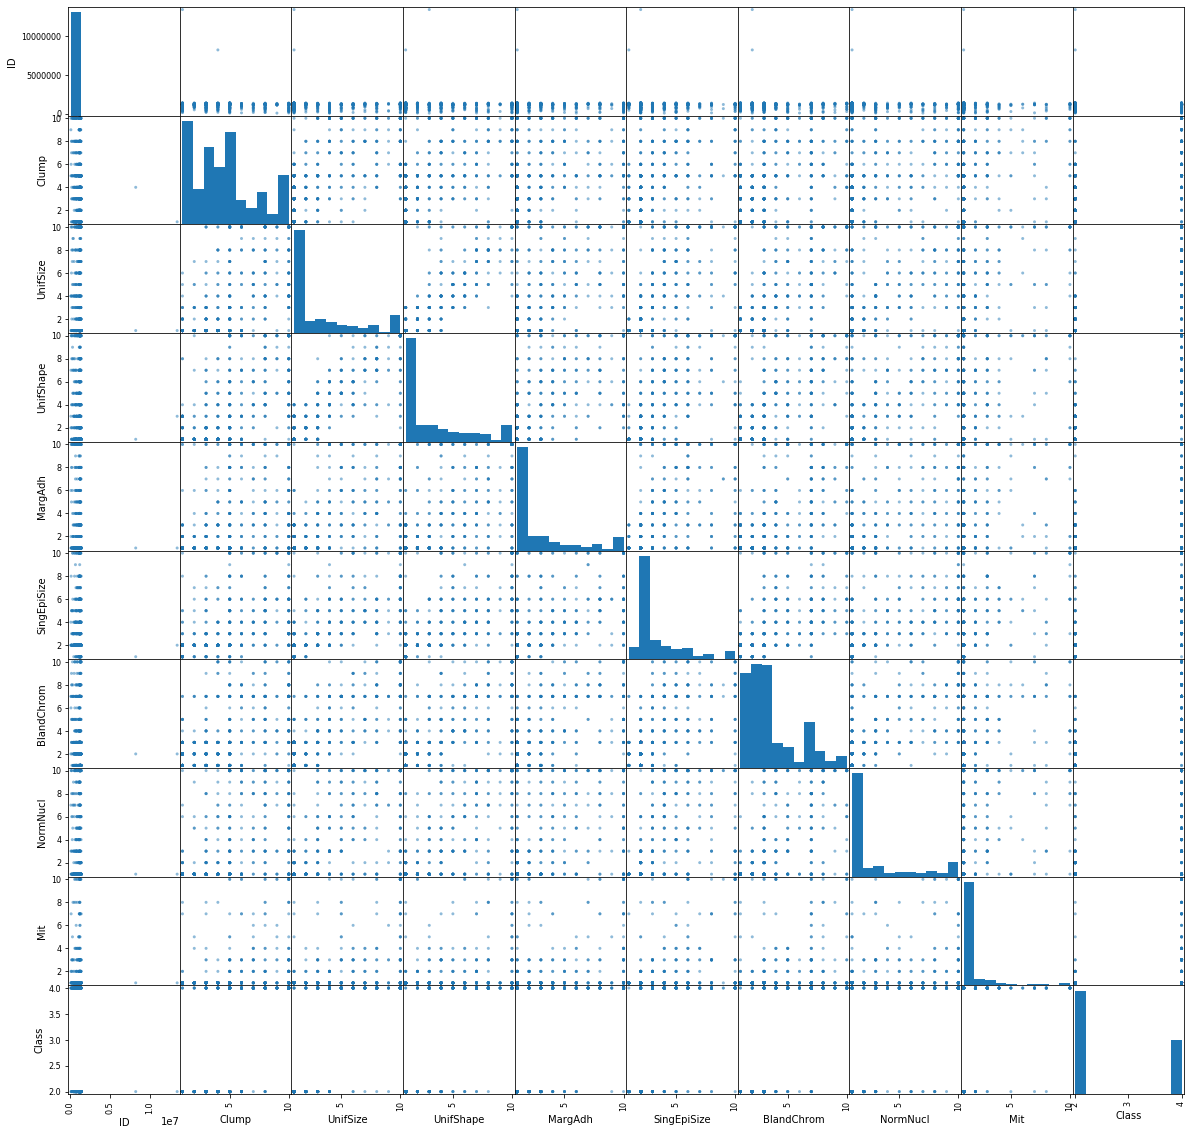

In [73]:
pd.plotting.scatter_matrix(cell_df,figsize=(20,20))
plt.show()

In [74]:
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [75]:
cell_df['BareNuc']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: BareNuc, Length: 699, dtype: object

In [76]:
is_numeric_dtype(cell_df['BareNuc'])

False

In [78]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int64')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [79]:
cell_df.shape

(683, 11)

In [80]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)

In [81]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y [0:5]

array([2, 2, 2, 2, 2])

In [82]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


In [95]:
model = svm.SVC(kernel='rbf',gamma='auto')
model.fit(X_train, y_train) 
yhat = model.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat,pos_label=2))

Avg F1-score: 0.9639
Jaccard score: 0.9444


In [97]:
model2 = svm.SVC(kernel='linear',gamma='auto')
model2.fit(X_train, y_train) 
yhat2 = model2.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat2,pos_label=2))

Avg F1-score: 0.9639
Jaccard score: 0.9444


In [100]:
model3 = svm.SVC(kernel='poly',gamma='auto')
model3.fit(X_train, y_train) 
yhat3= model3.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat3, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat3,pos_label=2))

Avg F1-score: 0.9711
Jaccard score: 0.9556


In [102]:
model4 = svm.SVC(kernel='sigmoid',gamma='auto')
model4.fit(X_train, y_train) 
yhat4= model4.predict(X_test)
print("Avg F1-score: %.4f" % f1_score(y_test, yhat4, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(y_test, yhat4,pos_label=2))

Avg F1-score: 0.3303
Jaccard score: 0.3358


The best model was with Polynomial Kernal with 97% average F1 score.